## Abstract

In this work we will to take a look at a data visualization using Python and the Titanic dataset. It's not intended to be the most accurate Titanic dataset analysis about Titanic, it's a project resultant of the course Data Analyst Nanodegree by Udacity,however it is a serious project, so I believe it will be interesting to demonstrate the process to generate a data visualization and make some superficial conclusions about the data.

## Introdução

Esse trabalho tem como objetivo explorar um dos maiores desastres causados pela natureza e por sucessivas falhas humanas, é quase certeza(baseado no meu felling) que você, que está lendo este documento, já tenha ouvido falar sobre a trágica história do Titanic, eu poderia listar fácil 50 pessoas que já ouviram, ou melhor, assistiram a essa história mais de 5 vezes, - deixo aqui os meus parabéns ao James Cameron,  Leonardo DiCaprio. Kate Winslet e todos os outros envolvidos. Mas com um pouquinho de esforço o Jack poderia caber naquela porta também ein? - enfim, o objetivo aqui não é falar sobre a história do Titanic e muito menos sobre filme, Near, far, wherever you are I believe that the heart does go on, se você quiser saber sobre a história e filme basta pesquisar no Google (http://bfy.tw/Yys).

O objetivo desse trabalho é analisar esse acontecimento de uma outra perspectiva, não através da exposição de fatos históricos ou filmes "hollywoodianos", este fato será analisado através de um *dataset*(nome bonito para conjunto de dados) contendo dados demográficos e informações de 891 dos 2224 passageiros e tripulantes a bordo do Titanic , e não, o Jack não está presente nele, mas eu acredito que será possível observar alguns fatos interessantes, será?

É possível encontrar mais informações sobre este conjunto de dados no [site do Kaggle] (https://www.kaggle.com/c/titanic/data).


### O que essa análise pretende "revelar"?

Como já dito, ao longo desse trabalho será executada uma análise utilizando todo um conjunto de técnicas e tecnologias para então fazer reveleções sobre o caso do Titanic através desse conjunto de dados, mas é dificil chegar em algum lugar quando não se sabe onde ser quer chegar, sendo assim, serão definidas 3 questões a serem respondidas através da tortura desse *dataset*. Essas 3 questões serão o "norte" do trabalho, dando um caminho e destino para a análise, além de definir quais serão as "revelações", as questão são:

1. Qual era a quantidade de pessoas por sexo?
2. Qual era a quantidade de crianças, adultos e idosos, categorizadas por sexo?
3. Qual foi o sexo e idade maioria entre os sobreviventes?

## Preparação dos dados

### Obtendo os dados

Após definido o caminho e o destino é preciso cumprir outros requisitos, o primeiro dele é a obtenção dos dados, pois não é possível começar a se "aventurar" na exploração de dados sem o básico, que são os dados!


#### Imports

Três linhas de extrema importância para todo o projeto, o código abaixo é responsável por fazer a importação de todas as bibliotecas ou módulos necessários para o projeto:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Lendo o arquivo

"Lê"(carrega) o arquivo que contém o conjunto de dados e verifica superficialmente se os dados estão corretos:

In [2]:
titanic_dataframe = pd.read_csv("data/titanic_data.csv")

#Display total of rows in dataset
print "Total rows = "+str(len(titanic_dataframe))
print ""
#Print only the 5 first rows
print "Preview:"
titanic_dataframe.head()

Total rows = 891

Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Limpeza de dados

Dados carregados, agora é hora de começar a exploração? Mais ou menos, na verdade, para atingir o objetivo de explorar e por fim transpor os resultados de uma forma que sejam facilmente observáveis, antes existe uma fase pela qual deve-se passar, que a limpeza ou correção de dados e registros, pois ao pular essa fase corre-se o risco de trabalhar com um conjunto de dados contendo algum problema que inviabilizará o trabalho ou gerará erros nos resultados, e não é objetivo desse trabalho fazer falsa revelações. Logo em frente serão executadas 3 ações para esse processo de limpeza tendo em vista os objetivos que foram definidos no começo do trabalho.

##### 1. Checar os dados referentes a sexo

Nas 3 questões será necessário manipular informações de sexo dos passageiros, então é preciso avaliar se está tudo ok com esses dados, ao analisar o conjunto de dados é possível observar que existe uma coluna nomeada como Sex(surprise!), nela aparentemente contém o sexo para cada passageiro da lista, aparentemente pois pode existir algum valor inválido ou a ausência de algum valor para algum registro(entenda passageiro).

Então a primeira coisa que será feita é saber se todos os dados satisfazem as opções *male* ou *female*, que são os valores esperados na coluna *Sex* para cada registro. Para realizar essa tarefa será necessário "incriveis" uma linha de código:

In [3]:
#Return the total counts of each value in column
print titanic_dataframe['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64


Legal né? Com uma linha de código foi possível verificar os dados da coluna *Sex* de 891 registros, NICE! Após a execução do código acima é possível observar que não existem dados faltantes e que só existem dados com valores: *male* ou *female*, ou seja, todos os dados da coluna *Sex* do DataFrame estão corretos para os objetivos desse trabalho, não precisando de correções ou intervenções, sendo assim, é possível seguir em frente com a limpeza dos dados.

##### 2. Checar os dados referentes a idade

Para satisfazer duas das três questões definidas no começo do trabalho é necessário manipular os dados de idade dos passageiros, então agora será verificado se existe algum problema com os dados da coluna *Age*, mas antes de procurar por erros é preciso pressupor uma lista de erros que podem existir no conjunto de dados. No contexto atual foi imaginado 2 possíveis erros:

1. **Dados nulos:** Será preciso descobrir se todos os registro(Passageiros) possuem a coluna *Age* não nula.
2. **Dados não numéricos:** Os dados da coluna *Age* identificam a idade do passageiro, e é esperado que a idade seja em formato númerico, sendo assim será verificado se existe algum dado não númerico na coluna *Age*


Primeiro será "investigado" a existência de dados nulos, para isso será necessário novamente "incriveis" 2 linhas de código, a última é só para confirmar que os valores da coluna *Age* realmente são nulos, ou seja, é dispensável se você já tem experiência na área.

In [4]:
#Check missing data

#Get all data in titanic_dataframe with null(NaN) in the column Age
count_errors_age_null = titanic_dataframe[pd.isnull(titanic_dataframe['Age'])]

print "Amount missing data: "+str(count_errors_age_null.Age.value_counts(dropna=False))
count_errors_age_null.head()

Amount missing data: NaN    177
Name: Age, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


A "investigação" revelou 177 dados nulos(NaN) na coluna *Age* do dataframe titanic_dataframe e infelizmente no contexto desse trabalho não é possível obter os valores dos dados faltantes, sendo assim teremos que eliminar os registros que não possuem valor para a coluna *Age*.

A próxima célula de códigos obterá somente os dados não nulos do conjunto *titanic_dataframe*, além disso os dados válidos já serão separados por sexo, assim evita-se "duas viagens" e também será executado um teste nos valores da coluna *Age* para cada registro com o objetivo de verificar se eles são númericos, ou seja, 3 coelho em uma só cajadada. Não é possível fazer esse teste antes de remover os registro com valores *NaN* na coluna *Age*, pois aparentemente numpy.isreal trata *NaN* como valor real.

É importante salientar que o dataframe titanic_dataframe não será modificado, isso mantém o conjunto de dados original permitindo utilizá-lo no futuro caso venha ser necessário.

In [5]:
#Get all data with column Sex is 'equal' male and column Age 'is not null(NaN)'
males_notnull = titanic_dataframe[titanic_dataframe['Sex'] == 'male'][pd.notnull(titanic_dataframe['Age'])]

#Check all data in males_notnull is real ande get all wich is true
males_age_normalized = males_notnull[males_notnull['Age'].apply(np.isreal)]

#Get all data with column Sex is 'equal' female and column Age 'is not null(NaN)'
females_notnull = titanic_dataframe[titanic_dataframe['Sex'] == 'female'][pd.notnull(titanic_dataframe['Age'])]

#Check all data in females_notnull is real ande get all wich is true
females_age_normalized = females_notnull[females_notnull['Age'].apply(np.isreal)]
print ""

#Display amount erros
print "Errors: "+str(count_errors_age_null.Age.value_counts(dropna=False))
print ""
#Display amount valid males
print "Valid Age Men: "+str(len(males_age_normalized))

#Display amount valid females
print "Valid Age Women: "+str(len(females_age_normalized))

#Check if all data is present
print "Total: "+str(len(count_errors_age_null) + len(males_age_normalized) + len(females_age_normalized))+" = "+str(len(titanic_dataframe['Sex']=='male'))
print ""
print "Amount of valid data: "+str(+ len(males_age_normalized) + len(females_age_normalized))


Errors: NaN    177
Name: Age, dtype: int64

Valid Age Men: 453
Valid Age Women: 261
Total: 891 = 891

Amount of valid data: 714


/home/franklin/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/franklin/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


O código pode parecer grande, mas somente 4 linhas são realmente necessárias, as outras linhas são somente para explicitar que a operação foi realizada com sucesso. Abaixo serão exibidos os 5 primeiros registros dos novos dataframes gerados, só para desengargo de consciência e ter uma ideia se tudo realmente ocorreu da forma correta.

In [6]:
males_age_normalized.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [7]:
females_age_normalized.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Aparentemente tudo está correto, então é possível avançar para o próximo e último passo da limpeza.

##### 3. Checar os valores de sobrevivência:

Esse processo de limpeza será mais simples, já que boa parte do trabalho foi realizado no passo anterior. Os dados já foram analisados e é sabido que existe uma coluna *Survived*, esta coluna possui valores que variam entre 0 e 1, sendo:

1. 0 = Não sobreviveu
2. 1 = Sobreviveu

É preciso verificar se existe algum problema com os dados da coluna *Survived*, o problema mais comum é a falta de algum valor, o código abaixo buscará por dados faltantes na coluna *Survived* para cada datraframe gerado no passo anterior.

In [8]:
print len(males_age_normalized[pd.isnull(males_age_normalized['Survived'])])

print len(females_age_normalized[pd.isnull(females_age_normalized['Survived'])])

0
0


A aparentemente nenhum dado está faltando, então será verificado se existem dados diferente de 0 e 1 na coluna *Survived* de cada dataframe.

In [9]:
print len(males_age_normalized[(males_age_normalized['Survived'] != 0) & (males_age_normalized['Survived'] != 1)])
print len(females_age_normalized[(females_age_normalized['Survived'] != 0) & (females_age_normalized['Survived'] != 1)])

0
0


E aparentemente nenhum dado é diferente de 0 e 1 e assim o processo de limpeza é finalizado, agora é o momento de partir para a exploração e revelações, o que será que esse conjunto de dados irá revelar? Algo ele irá revelar, por bem ou por mal. #PAZ

## Exploração e Revelações

De agora em diante este trabalho terá como objetivo buscar de forma direta as respostas para as 3 questões levantadas na introdução.

### 1. Qual era a quantidade de pessoas por sexo?

Essa questão é bem simples de ser respondida com o conjunto de dados em questão, ainda bem já que ela é essencial para a análise, muito do trabalho para resolver essa questão já foi realizado na etapa de limpeza, agora só resta gerar uma visualização para comunicar os resultados.

Perceba que serão utilizados os dataframes:

1. males_age_normalized
2. females_age_normalized

Esses dataframes surgiram durante o processo de limpeza dos dados e serão a base para todo o restante do trabalho. Abaixo segue a visualização dos conjunto de dataframes.

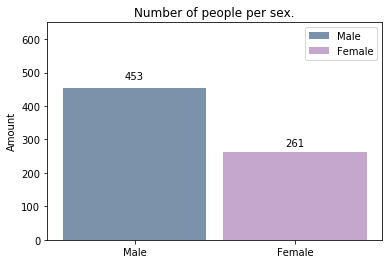

In [10]:
ind = np.arange(1)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind, males_age_normalized.Sex.count(), width, color='#7b92aa')

rects2 = ax.bar(ind + width + 0.04, females_age_normalized.Sex.count(), width, color='#c5a7ce')

ax.set_ylabel('Amount')
ax.set_title('Number of people per sex.')
plt.xticks((ind, ind + width + 0.04), ('Male', 'Female'))
#ax.set_xticklabels()
ax.set_ylim([0, 650])

ax.legend((rects1[0], rects2[0]), ('Male', 'Female'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

O gráfico acima gera um gráfico de barras, o eixo "X" representa duas categorias, no caso sexo e o eixo "Y" representa a quantidade de cada sexo, é possível observar que o sexo masculino é maioria no conjunto de dados, mais especificamente nos dataframes contendo somente registros válidos para análise.

O código para gerar o gráfico pode parecer complexo e/ou grande, mas poderia ser bem mais simples, porém era meu objetivo ter controle de cada aspecto do gráfico, cada um com as suas manias, mas o que importa mesmo é o que o gráfico revelou após os dados serem organizados e trabalhados.

E assim a primeira questão foi satisfeita, agora será possível seguir para a segunda questão.

### 2. Qual era a quantidade de crianças, adultos e idosos, categorizadas por sexo?

Com os dataframes de *males_age_normalized* e *females_age_normalized* contendo somente dados válidos tanto para o sexo como para a idade é possível separar os dados em crianças, adultos e idosos.

Para isso será definido as "classes" de idade para separar cada categoria:  
Crianças: [0 - 18[  
Adultos:  [18 - 50[  
Idosos:   [50 - +50]  

Definido o que significa crianças, adultos e idosos pode-se seguir para os dados:

In [11]:
males_age_normalized["age_group"] = pd.cut(titanic_dataframe.Age, [0, 18, 50, 150], labels=["boys", "men", "old_men"])
females_age_normalized["age_group"] = pd.cut(titanic_dataframe.Age, [0, 18, 50, 150], labels=["girls", "women", "old_women"])

O código acima acrescentou uma coluna *age_group* em cada um dos dois dataframes: *males_age_normalized*, *females_age_normalized*.

Para garantir que está tudo ok com os dados antes de coloca-los para revelar acho válido verificar se tudo está correto com os dados, com uma linha de código para cada categoria de idade é possível fazer essa verificação:

In [22]:
males_age_normalized[males_age_normalized["age_group"]=='boys']['Sex'].value_counts()

male    71
Name: Sex, dtype: int64

In [23]:
females_age_normalized[females_age_normalized["age_group"]=='girls']['Sex'].value_counts()

female    68
Name: Sex, dtype: int64

In [24]:
males_age_normalized[males_age_normalized["age_group"]=='men']['Sex'].value_counts()

male    335
Name: Sex, dtype: int64

In [25]:
females_age_normalized[females_age_normalized["age_group"]=='women']['Sex'].value_counts()

female    176
Name: Sex, dtype: int64

In [26]:
males_age_normalized[males_age_normalized["age_group"]=='old_men']['Sex'].value_counts()

male    47
Name: Sex, dtype: int64

In [27]:
females_age_normalized[females_age_normalized["age_group"]=='old_women']['Sex'].value_counts()

female    17
Name: Sex, dtype: int64

Aparentemente tudo está correto, sendo assim já é possível gerar um gráfico categorizando os passageiros, aqueles que possuem os dados válidos, por sexo e idade.

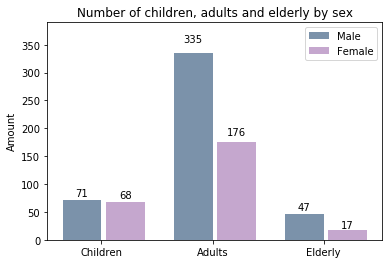

In [18]:
N = 3

ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind, males_age_normalized.groupby(['age_group']).size(), width, color='#7b92aa')

rects2 = ax.bar(ind + width + 0.04, females_age_normalized.groupby(['age_group']).size(), width, color='#c5a7ce')

ax.set_ylabel('Amount')
ax.set_title('Number of children, adults and elderly by sex')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Children', 'Adults', 'Elderly'))
ax.set_ylim([0, 390])

ax.legend((rects1[0], rects2[0]), ('Male', 'Female'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

O código gera um gráfico de barras novamente divido em categorias no eixo "X", mas agora as categorias são sexo e grupo de idade, já o eixo "Y" informa a quantidade de cada conjunto de categorias: sexo e idade. É um gráfico que comunica rápido muitos aspectos dos dados, como a pouca diferença entre crianças do sexo masculino e feminino e tudo de uma que é compreensível pela grande maioria das pessoas.

Novamente uma célula de código intimidadora, mas esse é preço a se pagar por querer tudo nos minimos detalhes.
E assim a questão 2 foi satisfeita, agora será proposto uma solução para a questão 3.

### 3. Qual foi o sexo e idade maioria entre os sobreviventes?

A intenção dessa questão é obter o sexo e a idade maioria entre os sobreviventes, para isso será selecionado somente os sobreviventes para cada dataframe: *males_age_normalized* e *females_age_normalized*

In [19]:
females_survived = females_age_normalized[females_age_normalized['Survived']==1]
males_survived = males_age_normalized[males_age_normalized['Survived']==1]


E por fim será gerado a visualização com os valores dos novos dataframes criados no passo anterior:

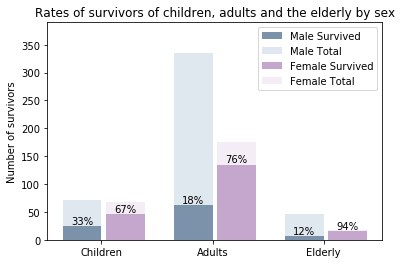

In [20]:
N = 3

diff_males_total_survived = males_age_normalized.groupby(['age_group']).size() - males_survived.groupby(['age_group']).size()
diff_females_total_survived = females_age_normalized.groupby(['age_group']).size() - females_survived.groupby(['age_group']).size()

ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
rects1a = ax.bar(ind, males_survived.groupby(['age_group']).size(), width, color='#7b92aa')
rects1b = ax.bar(ind, diff_males_total_survived, width, alpha=0.8, color='#D8E2EC', 
                 bottom=males_survived.groupby(['age_group']).size())

rects2a = ax.bar(ind + width + 0.04, females_survived.groupby(['age_group']).size(), width, color='#c5a7ce')
rects2b = ax.bar(ind + width + 0.04, diff_females_total_survived, width, color='#F4EDF6', 
                 bottom=females_survived.groupby(['age_group']).size())

ax.set_ylabel('Number of survivors')
ax.set_title('Rates of survivors of children, adults and the elderly by sex')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Children', 'Adults', 'Elderly'))
ax.set_ylim([0, 390])

ax.legend((rects1a[0], rects1b[0], rects2a[0], rects2b[0]), ('Male Survived', 'Male Total', 'Female Survived', 'Female Total'))

def autolabel_survived(rects, rects_top):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in range(len(rects)):
        height = rects[rect].get_height()
        total = rects[rect].get_height() + rects_top[rect].get_height()
        percent = int((height * 100) / total)
        ax.text(x = rects[rect].get_x() + rects[rect].get_width()/2., y = height,
                s = '%s' % str(percent)+'%',
                ha='center', va='bottom')
        

autolabel_survived(rects1a, rects1b)
autolabel_survived(rects2a, rects2b)


plt.show()


O gráfico acima é a grande revelação desse trabalho e todo esforço em fazer os dados "falarem", é uma revelação mais emocionante do que o os episódios finais de Baccano(fica a dica), mais emocionante do que final de temporada de série, mais emocionante do que descobrir que o assassino de alguma novela da Globo, ok, as novelas da Globo não são tudo isso(IMHO), mas ainda sim o gráfico é legal, pois através dele é possível ter uma noção dos sobrevivente de cada sexo e conjunto de idade, além também de estar explicito a razão de cada categoria de idade, sexo e o sobreviventes dessas categorias em relação aos não sobreviventes.

Esse gráfico nos revela coisas interessantes como o fato de que em nenhuma categoria de idade o sexo masculino alcançou 50% de sobreviventes, enquanto o sexo feminino alcançou mais de 50% de sobreviventes em todas as categorias de idade. 
Outro fato observável graças a visualização acima é que 94% das idosas sobreviveram, enquanto menos de 15% de homens idosos sobreviveram, graças a organização da visualização é possível observar também que até mesmo em números absolutos  as quantidade de idosas sobreviventes foi maior que a quantidade de homens idosos, e que isso é válido para os outros conjuntos de categorias de idade e sexo.

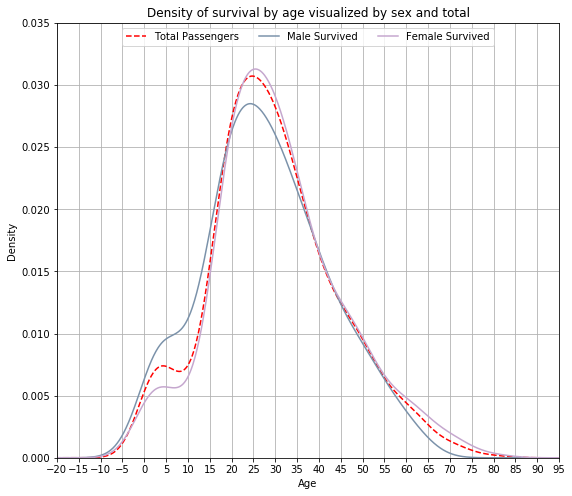

In [21]:
all_passengers_with_age = titanic_dataframe[pd.notnull(titanic_dataframe['Age'])]
my_plot = all_passengers_with_age['Age'].plot(kind='kde', color="red", figsize=(9, 8), linestyle='--')
my_plot = females_age_normalized['Age'].plot(kind='kde', color="#7b92aa")
my_plot = males_age_normalized['Age'].plot(kind='kde', color="#c5a7ce")
my_plot.set_xlabel("Age")
my_plot.set_ylabel("Density")
my_plot.grid(True)
my_plot.set_xticks(np.arange( -40,  110,  5))
my_plot.set_xlim([-20, 95])
my_plot.set_ylim([0, 0.035])
my_plot.set_title("Density of survival by age visualized by sex and total")
my_plot.legend(["Total Passengers", "Male Survived", "Female Survived",], loc=9,ncol=4)
plt.show()

O código acima gera um gráfico do tipo KDE(Kernel Density Estimators), graças ao gráfico acima é possível ter uma ideia da distribuição das idades de todos os passageiros, somente dos sobreviventes do sexo masculino e das sobreviventes do sexo feminimo, é possível avaliar onde há uma maior densidade de dados. Resultando semelhante poderia ser obtido com um histograma.

### Conclusão

Após essa jornada exploratória de um conjunto de dados contendo 891 registros foi possível, com pouco esforço(ou não), gerar 4 visualizações que satisfazem de eficiente as questões levantadas no começo do trabalho. Foram obtidas revelações que dificilmente seriam observadas analisando somente a forma tabular do dados, foi possível ter uma noção clara da quantidade de passageiros categorizados por sexo, onde foi revelado que a maioria eram do sexo masculino, também foi revelado a quantidade de passageiros categorizados por sexo e categorias de idades, novamente a quantidade de passageiros do sexo masculino se sobressaiu em relação ao sexo feminino, principalmente entre os adultos e por fim foi possível observar a taxa de sobrevivência para cada sexo divido por categorias de idades, tal observação fez a revelação de que mesmo os passageiros sendo em maioria do sexo masculino, a maioria dos sobreviventes era do sexo feminino, onde passageiros do sexo feminino tiveram uma taxa de sobrevivência maior que 60%, enquanto o sexo masculino não alcançou uma taxa de sobrevivência de ao menos 40% em qualquer categoria de idade.

Será que aquela ideia de mulheres e crianças primeiro realmente é válida? Bom, para o conjunto de dados analisado é possível dizer que passageiros do sexo feminino tiveram uma boa taxa de sobrevivência e passageiros na categoria de idade crianças também, mas não é possível fazer inferências ou chegar a qualquer conclusão sobre a tragédia e seus contextos, talvez quem sobreviveu ou não pode ser unicamente uma derivação do local onde a pessoa estava no navio na hora do acidente, uma variável oculta que não está no dataset. Sem todos os dados, é fácil confundir ruído com sinal, e esse é um erro comum na análise de dados.

Sendo assim é importante salientar que o dataset pode dizer algumas coisas, mas somente sobre o próprio dataset e nada mais. Outras questões poderiam ser levantadas sobre o dataset e respondidas para esse dataset, sem inferências ou conclusões, esse trabalho foi um belo exercicio sobre o processo da análise de dados e os objetivos estipulados foram cumpridos.

### Bibliografia

Overview &mdash; Matplotlib 2.0.0 documentation  
http://matplotlib.org/contents.html

Numpy and Scipy Documentation  
https://docs.scipy.org/doc/

pandas: powerful Python data analysis toolkit  
http://pandas.pydata.org/pandas-docs/stable/#

Selecting Pandas DataFrame Rows Based On Conditions  
http://chrisalbon.com/python/pandas_selecting_rows_on_conditions.html

Stacked Bar Plot In MatPlotLib  
http://chrisalbon.com/python/matplotlib_stacked_bar_plot.html

Simple Graphing with IPython and Pandas   
http://pbpython.com/simple-graphing-pandas.html

Histograms and Kernel Density Estimation (KDE)  
http://www.mglerner.com/blog/?p=28

An introduction to kernel density estimation  
http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/